In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import BernoulliNB

# Loading the Dataset

In [2]:

con = sqlite3.connect('database.sqlite') 

In [3]:
filtered_data=pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""",con)
filtered_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative

In [6]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [7]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [13]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [14]:
data=pd.DataFrame(final)

In [15]:
sampled_data=data.sample(frac=1)

In [16]:
final=pd.DataFrame(sampled_data)

In [17]:
final_data=final[0:1000]

In [18]:
final_data=final_data.sort_values('Time')

# Bag of words


In [19]:
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn
final_counts = count_vect.fit_transform(final_data['Text'].values)
final_counts=final_counts.toarray()



In [20]:

import seaborn as sn
from sklearn.manifold import TSNE


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data cleaning

In [22]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'very', 'all', 't', 'up', 'hers', 'after', 'can', 'myself', 'y', 'during', 'hasn', 'isn', 'mightn', 'hadn', 'ours', 'few', 'have', 'where', 'some', 'again', 'not', "aren't", 'to', 'on', 'am', 'my', 'she', 'when', 'm', 'than', 'o', 'does', 'was', 'shan', 'from', 'other', 'i', 'how', 'herself', 'd', 'themselves', 's', 'don', "isn't", 'won', 'having', 'each', 'now', 'needn', "wouldn't", "doesn't", 'these', 'being', 'whom', 'of', "weren't", 'do', 'doesn', 'shouldn', "couldn't", 'into', 'doing', 'both', 'and', 'did', 'haven', 'mustn', 'under', 'out', 'couldn', 'who', "needn't", 'there', 'he', "it's", 'its', 'which', "you'd", 'be', 'over', 'an', 'here', 'too', 'aren', "you've", 'further', 'yourself', 'wouldn', 'is', "haven't", 've', 'her', 'will', 'll', 'below', 'their', 'should', 'then', 'why', 'more', 'or', "won't", "shouldn't", 'the', "mightn't", 'own', 'nor', 'just', 'it', 'them', 'no', "don't", 'are', 'were', 'what', 'this', 'weren', 'but', 'such', 'yours', "that'll", "should've", 'bee

In [23]:
labels=final_data['Score']

# Prediction using Bernoulli Naive Bayes

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [29]:
y = np.array(final_data['Score'])


In [30]:
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler(with_mean= False ).fit_transform(final_counts)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



The optimal alpha is 3.


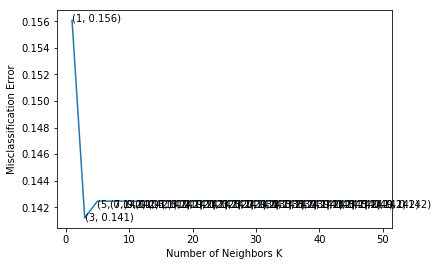

the misclassification error for each k value is :  [0.156 0.141 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142
 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142 0.142
 0.142]


In [31]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(standardised_data, y, test_size=0.2, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    clf = BernoulliNB(alpha=k, binarize=0.0, fit_prior=True, class_prior=None)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [33]:
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the BernoulliNB classifier for k = %d is %f%%' % (optimal_alpha, acc))


The accuracy of the BernoulliNB classifier for k = 3 is 85.500000%


# Calculating Precision, Recall and F1 score


In [33]:
from sklearn.metrics import confusion_matrix
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)
print(clf_optimal.coef_)
# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
matrix = confusion_matrix(y_test, pred) 
tn,fp,fn,tp= confusion_matrix(y_test, pred).ravel()
print(tn,fp,fn,tp)
precision=tp/(tp+fp)
recall=tp/(fn+tp)
f1=(2*((precision*recall)/(precision+recall)))
print("recall is:",recall)
print("precision is:",precision)
print("f1 score is:",f1)

print(matrix)

[[-4.19803702 -4.78582369 -4.60350213 ... -4.60350213 -4.60350213
  -4.60350213]]
0 42 0 258
recall is: 1.0
precision is: 0.86
f1 score is: 0.924731182795699
[[  0  42]
 [  0 258]]


# Showing how the output is coming

In [34]:

pred = clf_optimal.predict([X_test[0]])
print(pred)

['positive']


# Tf_idf

In [38]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final_data['Text'].values)
final_tf_idf.get_shape()
features = tf_idf_vect.get_feature_names()

# Prediction


The optimal alpha is 3.


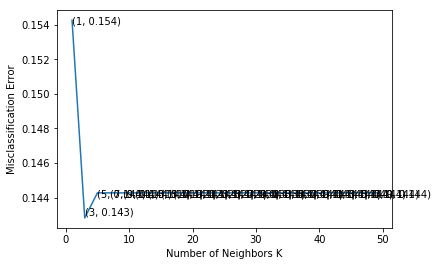

the misclassification error for each k value is :  [0.154 0.143 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(final_tf_idf, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    clf = BernoulliNB(alpha=k, binarize=0.0, fit_prior=True, class_prior=None)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [40]:
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Bernoulli classifier for k = %d is %f%%' % (optimal_alpha, acc))


The accuracy of the Bernoulli classifier for k = 3 is 86.000000%


# Word2Vec

In [42]:
import gensim

C:\Users\Ashok\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [43]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

In [44]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [45]:
i=0
list_of_sent=[]
for sent in final_data['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)


In [46]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)  

# AVGW2V

In [47]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
          

1000
50


In [48]:
from sklearn.preprocessing import Imputer

trainDataVecs = Imputer().fit_transform(sent_vectors)

In [49]:
a=np.array(trainDataVecs)

In [50]:
avgw2v=pd.DataFrame(a)

# PREDICTION



The optimal alpha is 1.


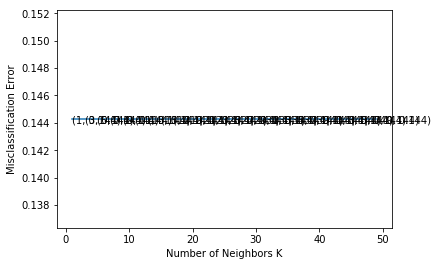

the misclassification error for each k value is :  [0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144 0.144
 0.144]


In [51]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(avgw2v, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    clf = BernoulliNB(alpha=k, binarize=0.0, fit_prior=True, class_prior=None)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [52]:
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the Bernoulli classifier for k = %d is %f%%' % (optimal_alpha, acc))


The accuracy of the Bernoulli classifier for k = 1 is 86.000000%


# TFIDF W2V

In [53]:
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [54]:
a=np.array(tfidf_sent_vectors)

In [55]:
avgtfidf=pd.DataFrame(a)

# PREDICTION


The optimal alpha is 1.


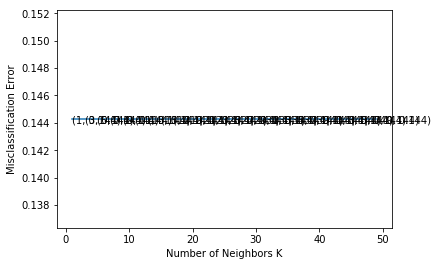

In [56]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(avgtfidf, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    clf = BernoulliNB(alpha=k, binarize=0.0, fit_prior=True, class_prior=None)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_alpha = neighbors[MSE.index(min(MSE))]
print('\nThe optimal alpha is %d.' % optimal_alpha)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [57]:
clf_optimal = BernoulliNB(alpha=optimal_alpha , binarize=0.0 , fit_prior=False, class_prior=[1,1])

# fitting the model
clf_optimal.fit(X_train, y_train)

# predict the response
pred = clf_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the bernoulli classifier for k = %d is %f%%' % (optimal_alpha, acc))


The accuracy of the bernoulli classifier for k = 1 is 86.000000%


In [58]:
# split the data set into train and test
X_1, X_test, y_1, y_test = cross_validation.train_test_split(avgtfidf, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    clf = BernoulliNB(alpha=i, binarize=0.0, fit_prior=True, class_prior=None)

    # fitting the model on crossvalidation train
    clf.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = clf.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for alpha = %d is %d%%' % (i, acc))
    
clf = BernoulliNB(alpha=5, binarize=0.0, fit_prior=True, class_prior=None)
clf.fit(X_tr,y_tr)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for alpha = 1 is %d%%' % (acc))


CV accuracy for alpha = 1 is 85%

CV accuracy for alpha = 3 is 85%

CV accuracy for alpha = 5 is 85%

CV accuracy for alpha = 7 is 85%

CV accuracy for alpha = 9 is 85%

CV accuracy for alpha = 11 is 85%

CV accuracy for alpha = 13 is 85%

CV accuracy for alpha = 15 is 85%

CV accuracy for alpha = 17 is 85%

CV accuracy for alpha = 19 is 85%

CV accuracy for alpha = 21 is 85%

CV accuracy for alpha = 23 is 85%

CV accuracy for alpha = 25 is 85%

CV accuracy for alpha = 27 is 85%

CV accuracy for alpha = 29 is 85%

****Test accuracy for alpha = 1 is 86%


# Prediction using Logistic regression

# using grid_search

In [59]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
X_train, X_test, y_train, y_test = train_test_split(final_counts, y, train_size=.9)


#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.86


# using random search

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

tuned_parameters = {'C': np.random.uniform(10**-4,10**4,1000)}
X_train, X_test, y_train, y_test = train_test_split(final_counts, y, train_size=.9)


#Using GridSearchCV
model =  RandomizedSearchCV(LogisticRegression(penalty='l1'), tuned_parameters, scoring = 'accuracy', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=250.80065891827979, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.9


clf = LogisticRegression(C=0.01, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))
print(clf.score(X_test, y_test))